In [1]:
PSDS_PATH = '.'

In [2]:
library(ggplot2)

### Load files
- session_times <- read.csv(file.path(PSDS_PATH, 'data', 'web_page_data.csv'))
- session_times[,2] <- session_times[,2] * 100
- four_sessions  <- read.csv(file.path(PSDS_PATH, 'data', 'four_sessions.csv'))
- click_rate <-  read.csv(file.path(PSDS_PATH, 'data', 'click_rates.csv'))
- imanishi <-  read.csv(file.path(PSDS_PATH, 'data', 'imanishi_data.csv'))

### 👩🏻‍ Web page session data
- permutation 1번 시행하는 함수(perm_fun)은 여기있다

#### ✅ session time - 실수 값

In [3]:
session_times <- read.csv(file.path(PSDS_PATH, 'data', 'web_page_data.csv'))

In [5]:
head(session_times)

,Page,Time
,<chr>,<dbl>
1,Page A,0.21
2,Page B,2.53
3,Page A,0.35
4,Page B,0.71
5,Page A,0.67
6,Page B,0.85


In [6]:
session_times[,2] <- session_times[,2] * 100
head(session_times)

,Page,Time
,<chr>,<dbl>
1,Page A,21
2,Page B,253
3,Page A,35
4,Page B,71
5,Page A,67
6,Page B,85


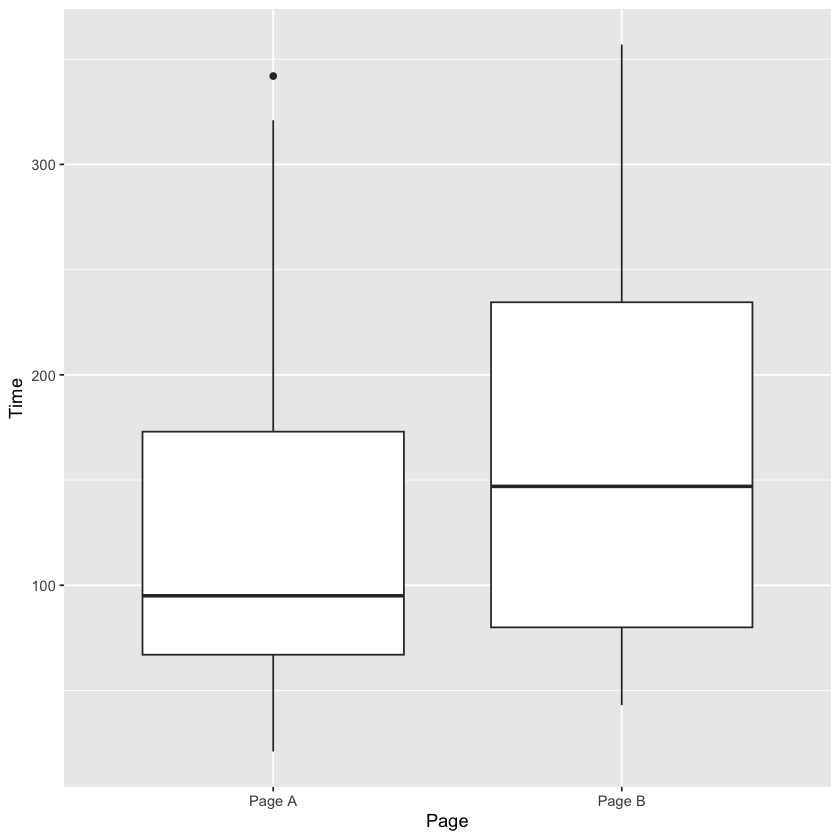

In [7]:
ggplot(session_times, aes(x=Page, y=Time)) + geom_boxplot()

In [11]:
# get mean
mean_a <- mean(session_times[session_times['Page'] == 'Page A', 'Time'])
mean_b <- mean(session_times[session_times['Page'] == 'Page B', 'Time'])

In [12]:
mean_b - mean_a

[1] 35.66667

In [5]:
# Permutation test (⭐️⭐️⭐️)
## 한 번의 검정 통계량(평균 차이) 얻는 함수 
perm_fun <- function(x, nA, nB)
    {
    n <- nA + nB
    idx_b <- sample(1:n, nB) # 1~n 사이 중 nB 개를 뽑는다
    idx_a <- setdiff(1:n, idx_b) # 1~n 사이 중 idx_b를 제외한 나머지 요소 
    mean_diff <- mean(x[idx_b])-mean(x[idx_a])
    return(mean_diff)
}

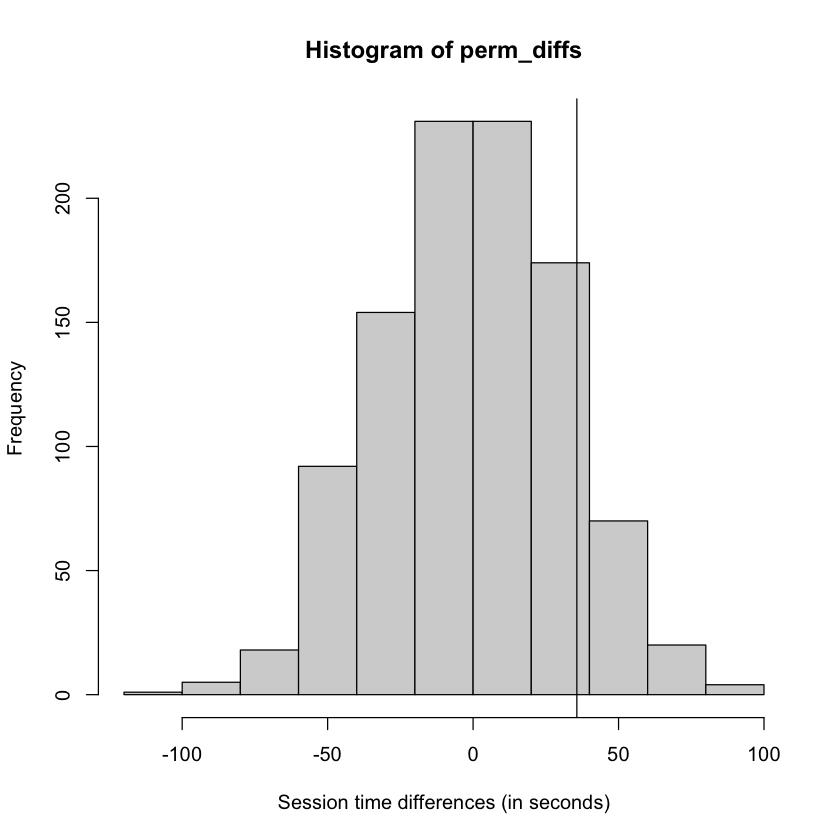

In [14]:
perm_diffs <- rep(0, 1000)
for (i in 1:1000) {
    perm_diffs[i] = perm_fun(session_times[, 'Time'], 21, 15)
}
hist(perm_diffs, xlab='Session time differences (in seconds)')
abline(v=mean_b-mean_a) # 수직선을 추가할 x 좌표 

In [15]:
# 우연하게 실제 그룹차이보다 더 큰 차이를 보일 확률
mean(perm_diffs > mean_b-mean_a)

[1] 0.128

#### ✅ 전환율 - binary
- 0,1로 이루어진 vector에서 평균 내면 전환율

In [7]:
# 두 가격에 따른 전환율 차이가 실제하는가? 
## 관측치
obs_pct_diff <- 100 * (200 / 23739 - 182 / 22588)
obs_pct_diff

[1] 0.03675791

In [8]:
# 제비뽑기할 pool. 전체 전환 O 데이터 개수 + 전환 X 데이터 개수 
conversion <- c(rep(0, 45945), rep(1, 382))
conversion

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [37] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [73] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [109] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [145] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [181] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [217] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [253] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [289] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [325] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [361] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [397] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [433] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [469] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [505] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [541] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [577] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [613] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [649] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [685] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [721] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [757] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [793] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [829] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [865] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [901] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [937] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [973] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1009] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1045] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1081] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1117] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1153] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1189] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1225] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1261] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1333] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1369] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1405] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1441] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1477] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1513] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1549] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1585] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1621] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1657] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1693] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1729] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1765] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [18

In [9]:
# 1000번의 permutation test statistics 얻을 것
perm_diffs <- rep(0, 1000)
for (i in 1:1000){
    # perm_fun(x, nA, nB): x에서 nA개 뽑고, nB개 뽑은 다음 각 vector의 평균 차이
    perm_diffs[i] = 100 * perm_fun(conversion, 23739, 22588)
}

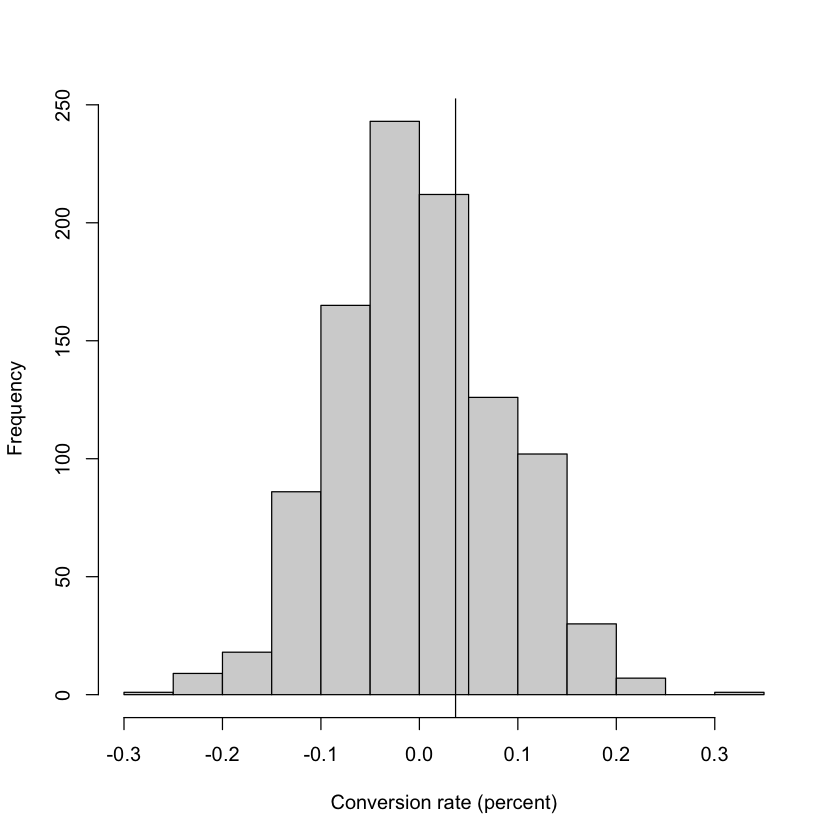

In [10]:
hist(perm_diffs, xlab='Conversion rate (percent)', main='')
abline(v=obs_pct_diff) # 관측치 차이가 분포 안에 존재하는가 확인 

##### > 관측된 차이가 범위 밖에 존재하는 경우 예시
- 히스토그램 위에 아예 등장하지를 않음

[1] "관측된 차이는 히스토그램 범위 밖에 있습니다."


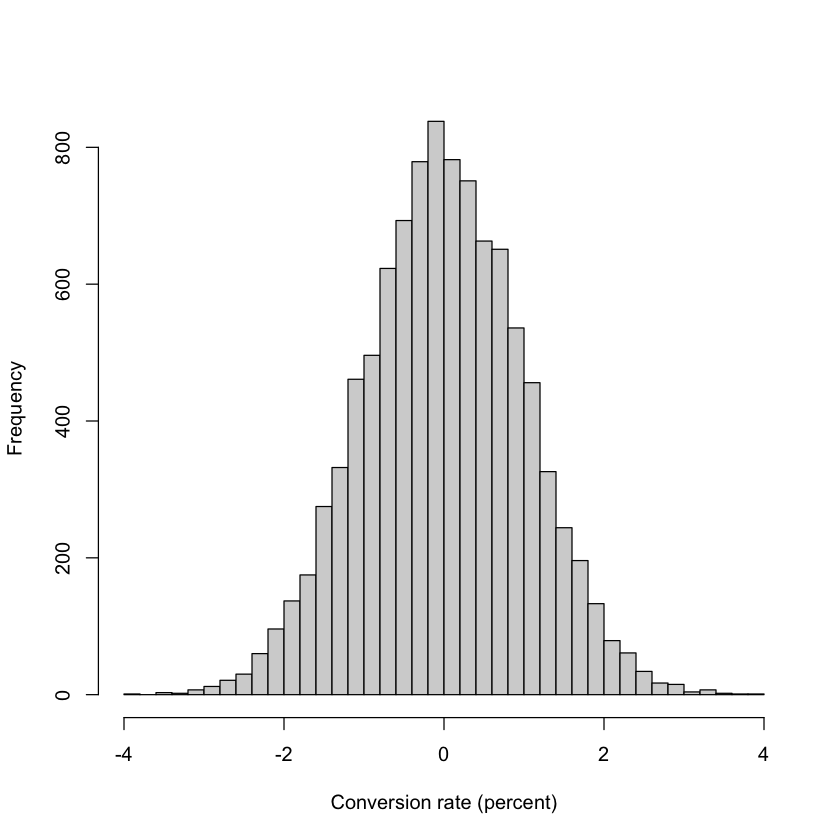

In [13]:
# 예제 데이터
set.seed(123)
test_perm_diffs <- rnorm(10000, mean = 0, sd = 1) # 예시 분포 (정규 분포)

# 관측된 차이
test_obs_pct_diff <- 10 # 예시로 극단적인 차이를 설정

# 히스토그램 그리기
hist(test_perm_diffs, xlab='Conversion rate (percent)', main='', breaks=30)
abline(v=test_obs_pct_diff, col='red', lwd=2) # 관측된 차이 표시

# 결과 출력
if (test_obs_pct_diff > max(test_perm_diffs) | test_obs_pct_diff < min(test_perm_diffs)) {
  print("관측된 차이는 히스토그램 범위 밖에 있습니다.")
} else {
  print("관측된 차이는 히스토그램 범위 안에 있습니다.")
}

##### done

In [11]:
# p값
mean(perm_diffs > obs_pct_diff)

[1] 0.337

In [12]:
# 가설이 이항분포를 따르기 때문에 p값을 permutation test 없이 근사하는 방법 
## x:성공 횟수, n: 시행 횟수, alternative: 대립가설로 첫 번째 집단의 비율이 두 번째 집단의 비율보다 크다는 것을 검정
prop.test(x=c(200, 182), n=c(23739, 22588), alternative='greater')


	2-sample test for equality of proportions with continuity correction

data:  c(200, 182) out of c(23739, 22588)
X-squared = 0.14893, df = 1, p-value = 0.3498
alternative hypothesis: greater
95 percent confidence interval:
 -0.001057439  1.000000000
sample estimates:
     prop 1      prop 2 
0.008424955 0.008057376 


### 🍺 T-test

In [15]:
session_times <- read.csv(file.path(PSDS_PATH, 'data', 'web_page_data.csv'))
session_times[,2] <- session_times[,2] * 100

In [4]:
t.test(Time ~ Page, data=session_times, alternative='less')


	Welch Two Sample t-test

data:  Time by Page
t = -1.0983, df = 27.693, p-value = 0.1408
alternative hypothesis: true difference in means between group Page A and group Page B is less than 0
95 percent confidence interval:
     -Inf 19.59674
sample estimates:
mean in group Page A mean in group Page B 
            126.3333             162.0000 


## 🌠 ANOVA

In [1]:
#install.packages('lmPerm')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(lmPerm)

In [3]:
four_sessions  <- read.csv(file.path(PSDS_PATH, 'data', 'four_sessions.csv'))

In [9]:
head(four_sessions)

,Page,Time
,<chr>,<int>
1,Page 1,164
2,Page 2,178
3,Page 3,175
4,Page 4,155
5,Page 1,172
6,Page 2,191


In [10]:
summary(aovp(Time ~ Page, data=four_sessions))

[1] "Settings:  unique SS "


Component 1 :
            Df R Sum Sq R Mean Sq Iter Pr(Prob)  
Page1        3    831.4    277.13 3403  0.07611 .
Residuals   16   1618.4    101.15                
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


#### F-statistics

In [4]:
summary(aov(Time ~ Page, data=four_sessions))

            Df Sum Sq Mean Sq F value Pr(>F)  
Page         3  831.4   277.1    2.74 0.0776 .
Residuals   16 1618.4   101.2                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [1]:
(14-11.33) / sqrt(11.33)

[1] 0.7932248

### 👨🏻‍🎤Chi-square statistics

In [3]:
click_rate <- read.csv(file.path(PSDS_PATH, 'data', 'click_rates.csv'))

###### 데이터 가공

In [11]:
nrow(click_rate)

[1] 6

In [6]:
head(click_rate)

,Headline,Click,Rate
,<chr>,<chr>,<int>
1,Headline A,Click,14
2,Headline A,No-click,986
3,Headline B,Click,8
4,Headline B,No-click,992
5,Headline C,Click,12
6,Headline C,No-click,988


In [4]:
clicks <- matrix(click_rate$Rate, nrow=3, ncol=2, byrow=TRUE)
clicks

14,986
8,992
12,988


In [13]:
list(unique(click_rate$Headline), unique(click_rate$Click))

[[1]]
[1] "Headline A" "Headline B" "Headline C"

[[2]]
[1] "Click"    "No-click"

In [5]:
dimnames(clicks) <- list(unique(click_rate$Headline), unique(click_rate$Click))

In [6]:
dimnames(clicks)

[[1]]
[1] "Headline A" "Headline B" "Headline C"

[[2]]
[1] "Click"    "No-click"

In [7]:
clicks

,Click,No-click
Headline A,14,986
Headline B,8,992
Headline C,12,988


###### done

In [20]:
chisq.test(clicks, simulate.p.value=TRUE) # 몬테카를로 시뮬레이션 사용 


	Pearson's Chi-squared test with simulated p-value (based on 2000
	replicates)

data:  clicks
X-squared = 1.6659, df = NA, p-value = 0.4848


In [8]:
chisq.test(clicks, simulate.p.value=FALSE) # 이론적 카이제곱분포 사용하여 근사 


	Pearson's Chi-squared test

data:  clicks
X-squared = 1.6659, df = 2, p-value = 0.4348


In [9]:
fisher.test(clicks)                                                  


	Fisher's Exact Test for Count Data

data:  clicks
p-value = 0.4824
alternative hypothesis: two.sided


### 👛 Sample size 결정

In [1]:
install.packages('pwr')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(pwr)

In [6]:
effect_size = ES.h(p1=0.0121, p2=0.011)
effect_size

[1] 0.01029785

In [7]:
pwr.2p.test(h=effect_size, sig.level=0.05, power=0.8, alternative='greater')


     Difference of proportion power calculation for binomial distribution (arcsine transformation) 

              h = 0.01029785
              n = 116601.7
      sig.level = 0.05
          power = 0.8
    alternative = greater

NOTE: same sample sizes


In [8]:
effect_size = ES.h(p1=0.0165, p2=0.011)
pwr.2p.test(h=effect_size, sig.level=0.05, power=0.8, alternative='greater')


     Difference of proportion power calculation for binomial distribution (arcsine transformation) 

              h = 0.04746819
              n = 5487.731
      sig.level = 0.05
          power = 0.8
    alternative = greater

NOTE: same sample sizes
